<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏠 Modeling</h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the required Libraries, Metrics</h1>

In [50]:
!pip install -r requirements.txt

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the saved NumPy arrays i.e. X_train_df, X_test_df, y_train_df, and y_test_df </h1>

In [52]:
import numpy as np
import pandas as pd
X_train = np.load('../Data/X_train.npy')
X_test = np.load('../Data/X_test.npy')
y_train = np.load('../Data/y_train.npy')
y_test = np.load('../Data/y_test.npy')
X = np.load('../Data/X.npy')
y = np.load('../Data/y.npy')

***Declaring Evaluation functions***

In [53]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Regression Models</h1>

***Defining a DataFrame to Store Evaluation Values***

In [54]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44475.31659483561
MSE: 2923315541.425089
RMSE: 54067.69406424773
R2 Score: 0.6482919977750564
------------------------------
RMSE Cross-Validation: 60733.56637200186


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [56]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44475.4574183547
MSE: 2923319361.834684
RMSE: 54067.72939410979
R2 Score: 0.6482915381364689
------------------------------
RMSE Cross-Validation: 60733.13521398554


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [57]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44475.32600812345
MSE: 2923314381.7932377
RMSE: 54067.68334035811
R2 Score: 0.6482921372919153
------------------------------
RMSE Cross-Validation: 60733.38246615256


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [58]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44517.06407963734
MSE: 2924487350.6345367
RMSE: 54078.52947921695
R2 Score: 0.6481510158419728
------------------------------
RMSE Cross-Validation: 60632.36975926291


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [59]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 59690.95624145081
MSE: 4511273073.446866
RMSE: 67166.01129624169
R2 Score: 0.4572427034750751
------------------------------


RMSE Cross-Validation: 70272.87803912575


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [60]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 21412.548249999996
MSE: 1312885419.4623353
RMSE: 36233.760768961525
R2 Score: 0.8420449994240939
------------------------------
RMSE Cross-Validation: 44277.44965008543


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [61]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 24448.031484375
MSE: 1655791068.886847
RMSE: 40691.412716774124
R2 Score: 0.8007895621639927
------------------------------
RMSE Cross-Validation: 48923.41742481436


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The model gets better, its error reduces (RMSE goes down), and it becomes more accurate (R2 score goes up).***

In [62]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,21412.548250,1.312885e+09,36233.760769,0.842045,44277.449650
6,XGBRegressor,24448.031484,1.655791e+09,40691.412717,0.800790,48923.417425
3,ElasticNet,44517.064080,2.924487e+09,54078.529479,0.648151,60632.369759
1,Ridge,44475.457418,2.923319e+09,54067.729394,0.648292,60733.135214
2,Lasso,44475.326008,2.923314e+09,54067.683340,0.648292,60733.382466
0,LinearRegression,44475.316595,2.923316e+09,54067.694064,0.648292,60733.566372
4,SVR,59690.956241,4.511273e+09,67166.011296,0.457243,70272.878039


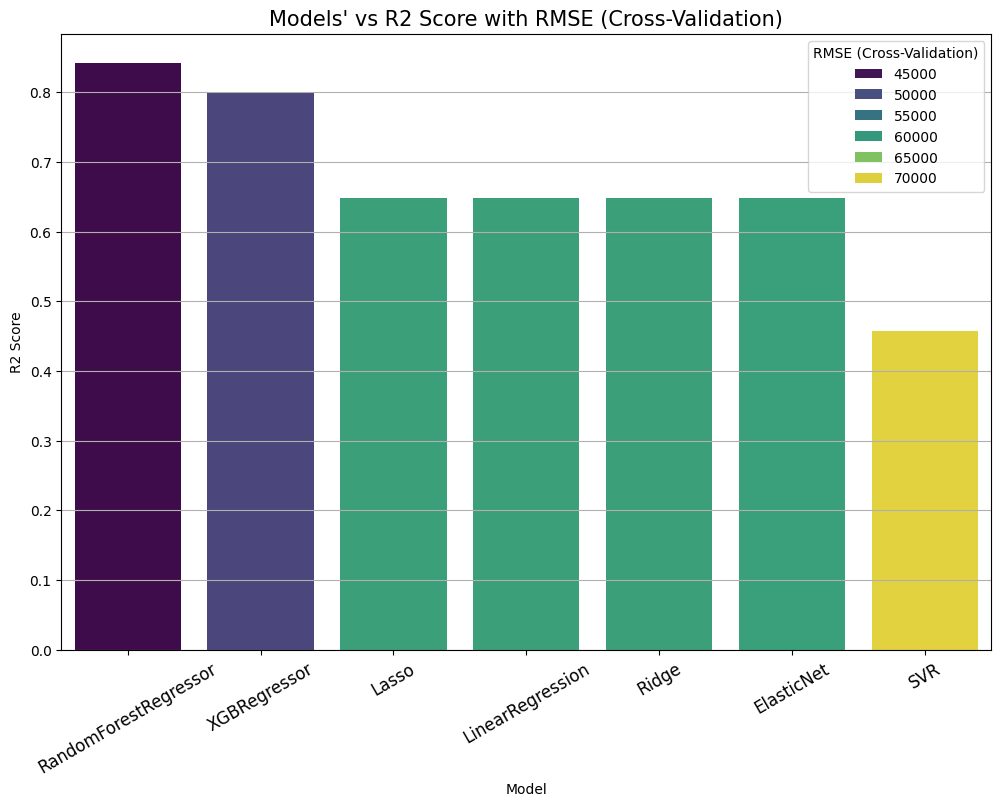

In [63]:
sorted_models = models.sort_values(by='R2 Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='R2 Score', hue='RMSE (Cross-Validation)', data=sorted_models, palette='viridis')
plt.title("Models' vs R2 Score with RMSE (Cross-Validation)", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.legend(title='RMSE (Cross-Validation)', loc='upper right')
plt.grid(axis='y')
plt.show()


# Model Performance Evaluation

Looking at the graphs and numbers, the <code>RandomForest Regressor</code> seems to work really well. It has a <code>high R2 score and a low RMSE</code>, which means it's good at predicting.

---

## Hyperparameter Tuning for RandomForest Regressor

Next, we're going to try and make the <code>RandomForest Regressor even better by Hyperparameter tuning</code>. Here's how we'll do it:

1. **Step 1:** Define the range of hyperparameters to explore.
2. **Step 2:** Utilize cross-validation techniques to assess different parameter combinations.
3. **Step 3:** Evaluate the model's performance using appropriate metrics.
4. **Step 4:** Fine-tune the hyperparameters based on the observed results to maximize the R2 score.

---


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Building Random Forest Regressor with best parameters</h1>

In [64]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_random_forest = grid_search.best_estimator_
best_random_forest.fit(X_train, y_train)

best_predictions = best_random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, best_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(best_random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)



MAE: 22076.814042541093
MSE: 1301497738.5024836
RMSE: 36076.276671830805
R2 Score: 0.8434150665494553
------------------------------
RMSE Cross-Validation: 43956.39034794853


In [65]:
new_row = {"Model": "Random Forest With Hyper Parameter Tuning","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])

In [66]:

models= pd.concat([models, new_row_df], ignore_index=True)
models.sort_values(by="RMSE (Cross-Validation)")


,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,Random Forest With Hyper Parameter Tuning,22076.814043,1.301498e+09,36076.276672,0.843415,43956.390348
5,RandomForestRegressor,21412.548250,1.312885e+09,36233.760769,0.842045,44277.449650
6,XGBRegressor,24448.031484,1.655791e+09,40691.412717,0.800790,48923.417425
3,ElasticNet,44517.064080,2.924487e+09,54078.529479,0.648151,60632.369759
1,Ridge,44475.457418,2.923319e+09,54067.729394,0.648292,60733.135214
2,Lasso,44475.326008,2.923314e+09,54067.683340,0.648292,60733.382466
0,LinearRegression,44475.316595,2.923316e+09,54067.694064,0.648292,60733.566372
4,SVR,59690.956241,4.511273e+09,67166.011296,0.457243,70272.878039


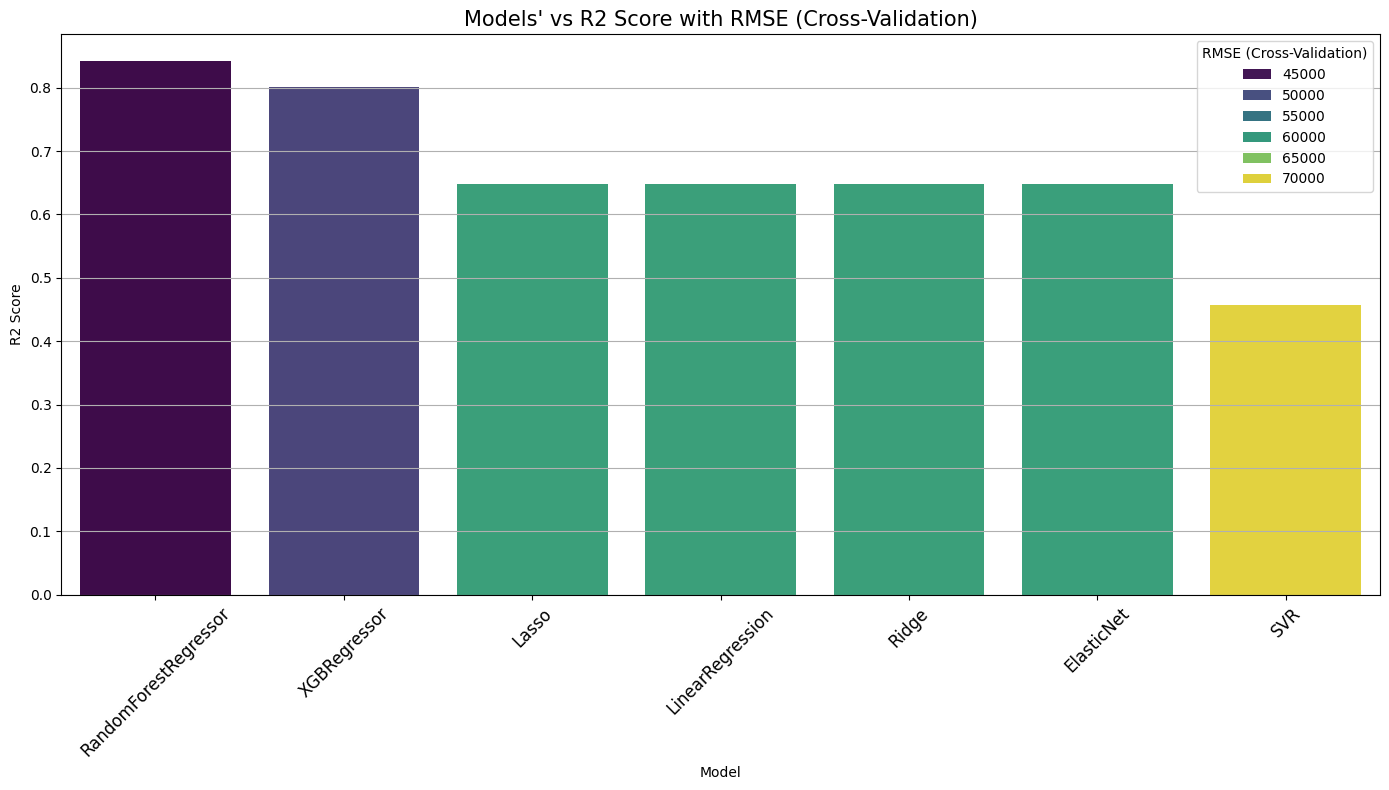

In [67]:


plt.figure(figsize=(14, 8))  # Increase the width of the figure
sns.barplot(x='Model', y='R2 Score', hue='RMSE (Cross-Validation)', data=sorted_models, palette='viridis')
plt.title("Models' vs R2 Score with RMSE (Cross-Validation)", size=15)
plt.xticks(rotation=45, size=12)  
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.legend(title='RMSE (Cross-Validation)', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()


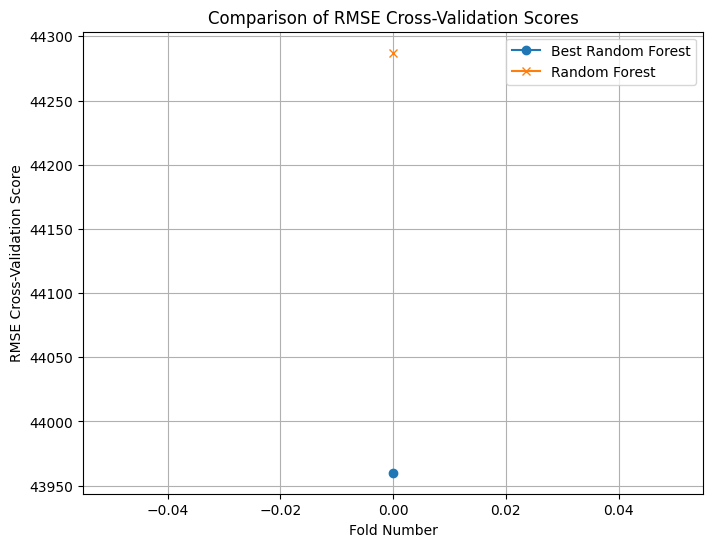

In [68]:
rmse_cross_val_best = rmse_cv(best_random_forest)  
rmse_cross_val_random = rmse_cv(best_random_forest) 
models.sort_values(by="RMSE (Cross-Validation)")["R2 Score"] 
plt.figure(figsize=(8, 6))
plt.plot(rmse_cross_val_best, label='Best Random Forest', marker='o')
plt.plot(rmse_cross_val_random, label='Random Forest', marker='x')
plt.title('Comparison of RMSE Cross-Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('RMSE Cross-Validation Score')
plt.legend()
plt.grid(True)
plt.show()


# <span style="font-family: 'Times New Roman', Times, serif;">Model Selection</span>

***
- selected hyperparameters not suit for dataset, leading to a decrease in performance metrics <code>R2 score and RMSE</code>.
- Hyperparameter tuning aims to improve a model's performance by adjusting its settings.
- <code>However, this adjustment might not suit the dataset, leading to reduced R2 score and RMSE.</code>
- This can occur due to preventing overfitting, which may limit the model's ability to capture complex patterns.
- It can also result from choosing suboptimal hyperparameters that hinder generalization to new data.

***

### Conclusion

<code>***Selecting Random Forest Regressor for Model Hosting.***</code>


***Serialize the Model:***

In [69]:
import joblib
joblib.dump(random_forest, 'model.pkl')

['model.pkl']